In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_VGG

Using TensorFlow backend.


Data type changed to float32, label type changed to categorical
Standardization Data


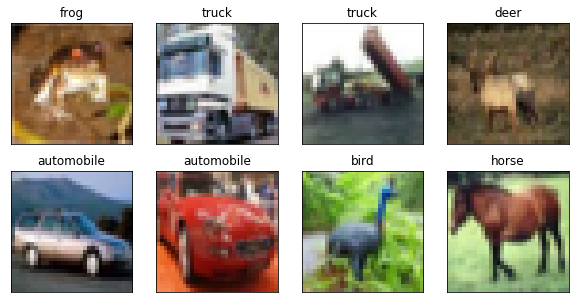

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_VGG.datasets.cifar10.load_data()


show_images(X_train_origin, Y_train_origin, 8)

(X_train, Y_train), (X_test, Y_test) = cifar_VGG_data_load(cifar10_VGG.datasets.cifar10, std_data = True)

In [3]:
cifar_model = cifar10_VGG.CifarVGG(img_shape = X_train[0].shape, class_num = Y_train.shape[1],
                                      do_batch_norm = True, do_drop = True)

모델 펼처보기

In [4]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

In [5]:
history_train = cifar_model.train(X_train, Y_train, epoch = 200, 
                                  batch_size = 16, aug_data = True)
#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

Data augmentation and Train
Epoch 1/200
2500/2500 [==============================] - 133s 53ms/step - loss: 1.8200 - acc: 0.3158 - val_loss: 2.1003 - val_acc: 0.3161

Epoch 00001: val_loss improved from inf to 2.10032, saving model to ./save_model/model/vgg_2019-05-12_13h16m49s/01-2.1003-0.3158.hd5
Epoch 2/200
2500/2500 [==============================] - 129s 52ms/step - loss: 1.5162 - acc: 0.4541 - val_loss: 1.4503 - val_acc: 0.4756

Epoch 00002: val_loss improved from 2.10032 to 1.45034, saving model to ./save_model/model/vgg_2019-05-12_13h16m49s/02-1.4503-0.4541.hd5
Epoch 3/200
2500/2500 [==============================] - 130s 52ms/step - loss: 1.3233 - acc: 0.5388 - val_loss: 1.2003 - val_acc: 0.5710

Epoch 00003: val_loss improved from 1.45034 to 1.20033, saving model to ./save_model/model/vgg_2019-05-12_13h16m49s/03-1.2003-0.5388.hd5
Epoch 4/200
2500/2500 [==============================] - 129s 52ms/step - loss: 1.1932 - acc: 0.5912 - val_loss: 0.9790 - val_acc: 0.6550

Epoch 000

2500/2500 [==============================] - 128s 51ms/step - loss: 0.2883 - acc: 0.9090 - val_loss: 0.3738 - val_acc: 0.8865

Epoch 00034: val_loss improved from 0.39132 to 0.37381, saving model to ./save_model/model/vgg_2019-05-12_13h16m49s/34-0.3738-0.9090.hd5
Epoch 35/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.2906 - acc: 0.9081 - val_loss: 0.4190 - val_acc: 0.8679

Epoch 00035: val_loss did not improve from 0.37381
Epoch 36/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.2794 - acc: 0.9137 - val_loss: 0.3730 - val_acc: 0.8849

Epoch 00036: val_loss improved from 0.37381 to 0.37303, saving model to ./save_model/model/vgg_2019-05-12_13h16m49s/36-0.3730-0.9137.hd5
Epoch 37/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.2749 - acc: 0.9139 - val_loss: 0.4150 - val_acc: 0.8734

Epoch 00037: val_loss did not improve from 0.37303
Epoch 38/200
2500/2500 [==============================] - 128s 51ms/step - lo


Epoch 00071: val_loss did not improve from 0.29605
Epoch 72/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.1356 - acc: 0.9557 - val_loss: 0.3598 - val_acc: 0.8911

Epoch 00072: val_loss did not improve from 0.29605
Epoch 73/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.1344 - acc: 0.9560 - val_loss: 0.4128 - val_acc: 0.8750

Epoch 00073: val_loss did not improve from 0.29605
Epoch 74/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.1331 - acc: 0.9571 - val_loss: 0.3204 - val_acc: 0.9009

Epoch 00074: val_loss did not improve from 0.29605
Epoch 75/200
2500/2500 [==============================] - 129s 51ms/step - loss: 0.1310 - acc: 0.9582 - val_loss: 0.3094 - val_acc: 0.9041

Epoch 00075: val_loss did not improve from 0.29605
Epoch 76/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.1267 - acc: 0.9600 - val_loss: 0.3647 - val_acc: 0.8872

Epoch 00076: val_loss did not improve from 0


Epoch 00113: val_loss did not improve from 0.27832
Epoch 114/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.0850 - acc: 0.9727 - val_loss: 0.3103 - val_acc: 0.9070

Epoch 00114: val_loss did not improve from 0.27832
Epoch 115/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.0832 - acc: 0.9736 - val_loss: 0.3137 - val_acc: 0.9044

Epoch 00115: val_loss did not improve from 0.27832
Epoch 116/200
2500/2500 [==============================] - 128s 51ms/step - loss: 0.0843 - acc: 0.9740 - val_loss: 0.2824 - val_acc: 0.9127

Epoch 00116: val_loss did not improve from 0.27832
Epoch 117/200
2500/2500 [==============================] - 129s 51ms/step - loss: 0.0842 - acc: 0.9730 - val_loss: 0.2794 - val_acc: 0.9135

Epoch 00117: val_loss did not improve from 0.27832
Epoch 118/200
2500/2500 [==============================] - 129s 51ms/step - loss: 0.0815 - acc: 0.9744 - val_loss: 0.3018 - val_acc: 0.9091

Epoch 00118: val_loss did not improve f

2500/2500 [==============================] - 129s 52ms/step - loss: 0.0634 - acc: 0.9805 - val_loss: 0.2999 - val_acc: 0.9104

Epoch 00156: val_loss did not improve from 0.27832
Epoch 157/200
2500/2500 [==============================] - 127s 51ms/step - loss: 0.0593 - acc: 0.9806 - val_loss: 0.2991 - val_acc: 0.9125

Epoch 00157: val_loss did not improve from 0.27832
Epoch 158/200
2500/2500 [==============================] - 129s 52ms/step - loss: 0.0615 - acc: 0.9803 - val_loss: 0.3148 - val_acc: 0.9098

Epoch 00158: val_loss did not improve from 0.27832
Epoch 159/200
2500/2500 [==============================] - 135s 54ms/step - loss: 0.0602 - acc: 0.9808 - val_loss: 0.2954 - val_acc: 0.9110

Epoch 00159: val_loss did not improve from 0.27832
Epoch 160/200
2500/2500 [==============================] - 135s 54ms/step - loss: 0.0603 - acc: 0.9810 - val_loss: 0.2945 - val_acc: 0.9136

Epoch 00160: val_loss did not improve from 0.27832
Epoch 161/200
2500/2500 [=============================

2500/2500 [==============================] - 139s 55ms/step - loss: 0.0502 - acc: 0.9836 - val_loss: 0.2936 - val_acc: 0.9205

Epoch 00199: val_loss did not improve from 0.27832
Epoch 200/200
2500/2500 [==============================] - 139s 55ms/step - loss: 0.0434 - acc: 0.9862 - val_loss: 0.3101 - val_acc: 0.9167

Epoch 00200: val_loss did not improve from 0.27832

 Training --- 26279.231397151947 sec---
10000/10000 [==============================] - 3s 340us/step
Test Loss :  0.3261552209943533
Test Accuracy :  0.9095
Test Loss :  0.3261552209943533
Test Accuracy :  90.95 %


In [6]:
prediction = cifar_model.predict(X_test)

In [7]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 8 8 1 6 6 1 6]


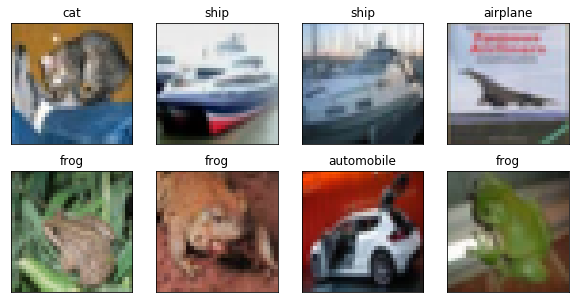

In [8]:
show_images(X_test_origin, Y_test_origin, 8)

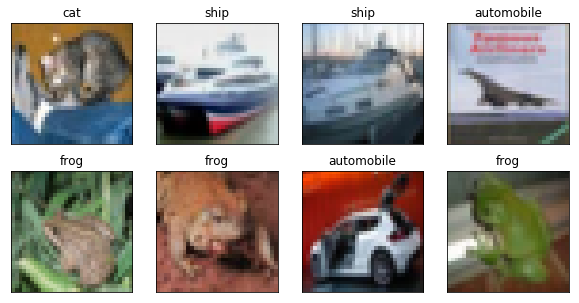

In [9]:
show_images(X_test_origin, prediction, 8)

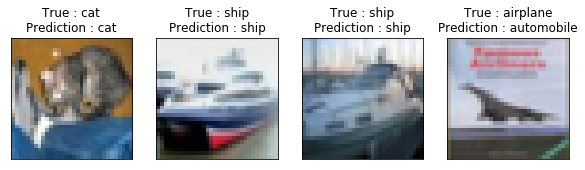

In [10]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [11]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 3s 330us/step
Test Loss :  0.3261552209943533
Test Accuracy :  0.9095


In [12]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[6.79707318e-06 7.61960246e-06 3.90752684e-05 9.97728884e-01
  1.20525823e-04 1.96758285e-03 3.25752153e-05 7.16399445e-05
  1.49599300e-05 1.04132123e-05]
 [5.58754837e-04 2.26607026e-05 2.23327777e-03 1.00696843e-05
  3.56800297e-06 4.83753429e-05 9.03314576e-05 3.11159276e-08
  9.97022569e-01 1.03040275e-05]
 [1.07214283e-02 2.11044371e-01 1.24823104e-03 5.47506334e-03
  7.10244931e-04 7.09804772e-06 1.06932558e-02 1.42312638e-05
  7.58584380e-01 1.50168827e-03]]


In [13]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 8 8]


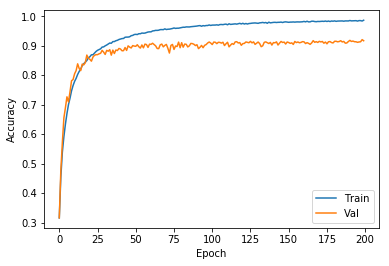

In [14]:
cifar10_VGG.plot_acc(history_train)

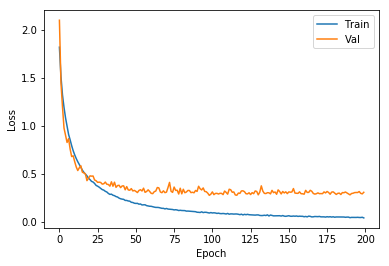

In [15]:
cifar10_VGG.plot_loss(history_train)

In [16]:
history_train.history['acc'][-1]

0.986225

In [17]:
Y_prediction = prediction

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[894  15  13   7   5   0   4   4  43  15]
 [  2 970   0   0   0   0   0   0   4  24]
 [ 14   0 887  23  35   7  19  10   5   0]
 [  7   8  18 845  24  36  23  15  11  13]
 [  5   1  17  23 914   3  16  19   1   1]
 [  7   1  23 109  31 794  12  17   4   2]
 [  6   4  15  14   8   1 945   1   2   4]
 [  8   1   1  19  15  14   1 937   1   3]
 [ 13   8   5   3   0   2   1   1 954  13]
 [  5  28   0   3   1   0   1   0   7 955]]


In [18]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1000
           1       0.94      0.97      0.95      1000
           2       0.91      0.89      0.90      1000
           3       0.81      0.84      0.83      1000
           4       0.88      0.91      0.90      1000
           5       0.93      0.79      0.86      1000
           6       0.92      0.94      0.93      1000
           7       0.93      0.94      0.94      1000
           8       0.92      0.95      0.94      1000
           9       0.93      0.95      0.94      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [19]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
cifar_model.model.pop()
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________